In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('clean_version2.csv',dtype = {'PRICE_NOTATION':'float','ROUNDED_NOTIONAL_AMOUNT_1':'float'})

In [4]:
print(data.PRICE_NOTATION.max())
print(data.PRICE_NOTATION.min())
print(data.PRICE_NOTATION.mean())

99.95
0.0
4.138320207774731


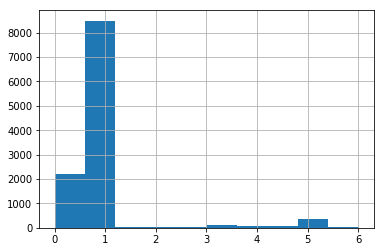

In [8]:
data[data['PRICE_NOTATION'] < 10]['PRICE_NOTATION'].hist()

In [13]:
#set up bins
bin_1 = [-0.01, 1, 2, 3, 5, 10, 20, 50, 100]
#index_1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
#use pd.cut function can attribute the values into its specific bins
pd.cut(data.PRICE_NOTATION, bin_1)

0        (-0.01, 1.0]
1        (-0.01, 1.0]
2        (-0.01, 1.0]
3          (1.0, 2.0]
4        (-0.01, 1.0]
5        (-0.01, 1.0]
6        (-0.01, 1.0]
7        (-0.01, 1.0]
8        (-0.01, 1.0]
9        (-0.01, 1.0]
10       (-0.01, 1.0]
11       (-0.01, 1.0]
12       (-0.01, 1.0]
13       (-0.01, 1.0]
14       (-0.01, 1.0]
15         (1.0, 2.0]
16         (1.0, 2.0]
17         (1.0, 2.0]
18         (1.0, 2.0]
19         (1.0, 2.0]
20         (1.0, 2.0]
21         (1.0, 2.0]
22         (1.0, 2.0]
23       (-0.01, 1.0]
24       (-0.01, 1.0]
25       (-0.01, 1.0]
26       (-0.01, 1.0]
27       (-0.01, 1.0]
28         (1.0, 2.0]
29       (-0.01, 1.0]
             ...     
11906    (-0.01, 1.0]
11907    (-0.01, 1.0]
11908    (-0.01, 1.0]
11909      (1.0, 2.0]
11910      (1.0, 2.0]
11911      (1.0, 2.0]
11912    (-0.01, 1.0]
11913    (-0.01, 1.0]
11914    (-0.01, 1.0]
11915    (-0.01, 1.0]
11916    (-0.01, 1.0]
11917      (1.0, 2.0]
11918      (1.0, 2.0]
11919      (1.0, 2.0]
11920     

In [16]:
bin_2 = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400]
pd.cut(data.ROUNDED_NOTIONAL_AMOUNT_1, bin_2)

0         (90, 100]
1          (20, 30]
2          (20, 30]
3          (20, 30]
4            (2, 5]
5          (50, 60]
6          (10, 20]
7            (0, 1]
8          (10, 20]
9           (5, 10]
10         (20, 30]
11         (20, 30]
12         (10, 20]
13         (10, 20]
14           (1, 2]
15           (2, 5]
16           (0, 1]
17           (0, 1]
18           (1, 2]
19           (1, 2]
20          (5, 10]
21          (5, 10]
22           (2, 5]
23        (90, 100]
24        (90, 100]
25         (70, 80]
26         (40, 50]
27         (30, 40]
28         (10, 20]
29        (90, 100]
            ...    
11906      (30, 40]
11907    (100, 400]
11908      (20, 30]
11909       (5, 10]
11910        (2, 5]
11911        (2, 5]
11912      (20, 30]
11913      (40, 50]
11914     (90, 100]
11915        (2, 5]
11916        (2, 5]
11917       (5, 10]
11918       (5, 10]
11919     (90, 100]
11920        (2, 5]
11921       (5, 10]
11922     (90, 100]
11923      (40, 50]
11924       (5, 10]


In [3]:
#set up bins
bin_1 = [-0.01, 1, 2, 3, 5, 10, 20, 50, 100]
index_1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data.PRICE_NOTATION, bin_1, labels = index_1)
category = category.to_frame()
category.columns = ['range_price']
#concatenate age and its bin
data_new = pd.concat([data,category],axis = 1)

#set up bins
bin_2 = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400]
index_2 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data.ROUNDED_NOTIONAL_AMOUNT_1, bin_2, labels = index_2)
category = category.to_frame()
category.columns = ['range_amount']
#concatenate age and its bin
df = pd.concat([data_new,category],axis = 1)

In [4]:
df.replace({'range_price': {'a': 0.5, 'b':1.5, 'c':2.5, 'd':4, 'e':7.5, 'f':15, 'g':35, 'h':75}, 
           'range_amount': {'a': 0.5, 'b':1.5, 'c':3.5, 'd':7.5, 'e':15, 'f':25, 'g':35, 'h':45, 
                            'i': 55, 'j':65, 'k':75, 'l':85, 'm': 95, 'n': 250}}, inplace = True)

In [5]:
df['PRICE_NOTATION'] = df['range_price']

In [6]:
df['ROUNDED_NOTIONAL_AMOUNT_1'] = df['range_amount']

In [7]:
df.drop(['range_price', 'range_amount'], axis = 1, inplace = True)

In [35]:
df.shape

(11936, 7)

In [8]:
df.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,0.5,95.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,25.0
2,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,25.0
3,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,1.5,25.0
4,CORRECT,C,UC,Credit:Index:CDX:CDXHY,Trade,0.5,3.5


In [27]:
df.groupby('ACTION')['ACTION'].count()


ACTION
CANCEL       35
CORRECT    2997
NEW        8904
Name: ACTION, dtype: int64

In [28]:
df.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count()

INDICATION_OF_COLLATERALIZATION
FC    3060
OC      57
PC    3262
UC    5557
Name: INDICATION_OF_COLLATERALIZATION, dtype: int64

In [30]:
df.groupby('PRICE_FORMING_CONTINUATION_DATA')['PRICE_FORMING_CONTINUATION_DATA'].count()

PRICE_FORMING_CONTINUATION_DATA
Amendment               857
Novation                456
Partialtermination      441
Trade                 10182
Name: PRICE_FORMING_CONTINUATION_DATA, dtype: int64

In [31]:
8*14*3*2*4*2*4

21504

In [9]:
new = pd.read_csv("data.csv", dtype = {'PRICE_NOTATION':'float','ROUNDED_NOTIONAL_AMOUNT_1':'float'})

In [10]:
new.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [36]:
new.shape[0]

719283

In [11]:
new.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,95.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,75.0,3.5
2,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,0.5,7.5
3,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,65.0
4,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,75.0,3.5


In [44]:
new.drop_duplicates()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,95.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,75.0,3.5
2,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,0.5,7.5
3,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,65.0
5,NEW,U,FC,Credit:Index:CDX:CDXIG,Amendment,0.5,7.5
6,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,0.5,0.5
9,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,0.5,7.5
11,NEW,U,OC,Credit:Index:CDX:CDXHY,Trade,1.5,15.0
12,NEW,U,FC,Credit:Index:CDX:CDXHY,Trade,1.5,1.5
14,CANCEL,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,35.0


In [46]:
new.columns.tolist()

['ACTION',
 'CLEARED',
 'INDICATION_OF_COLLATERALIZATION',
 'TAXONOMY',
 'PRICE_FORMING_CONTINUATION_DATA',
 'PRICE_NOTATION',
 'ROUNDED_NOTIONAL_AMOUNT_1']

In [51]:
df.drop_duplicates()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,0.5,95.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,25.0
2,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,25.0
3,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,1.5,25.0
4,CORRECT,C,UC,Credit:Index:CDX:CDXHY,Trade,0.5,3.5
5,CORRECT,C,FC,Credit:Index:CDX:CDXIG,Trade,0.5,55.0
6,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,15.0
7,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,0.5,0.5
9,NEW,U,UC,Credit:Index:CDX:CDXHY,Trade,0.5,7.5
10,CORRECT,U,UC,Credit:Index:CDX:CDXHY,Trade,0.5,25.0


In [20]:
merge = new.drop_duplicates().merge(df.drop_duplicates(), on=new.columns.tolist(), 
                   how='outer', indicator=True)

In [21]:
merge

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1,_merge
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,95.0,both
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,75.0,3.5,both
2,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,0.5,7.5,both
3,NEW,U,UC,Credit:Index:CDX:CDXIG,Novation,0.5,65.0,both
4,NEW,U,FC,Credit:Index:CDX:CDXIG,Amendment,0.5,7.5,both
5,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,0.5,0.5,both
6,NEW,U,PC,Credit:Index:CDX:CDXIG,Partialtermination,0.5,7.5,both
7,NEW,U,OC,Credit:Index:CDX:CDXHY,Trade,1.5,15.0,both
8,NEW,U,FC,Credit:Index:CDX:CDXHY,Trade,1.5,1.5,both
9,CANCEL,U,PC,Credit:Index:CDX:CDXIG,Trade,0.5,35.0,both


In [22]:
merge_new = merge[merge['_merge'] == 'both']

In [24]:
merge[merge['_merge'] == 'left_only']

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1,_merge


In [23]:
merge_new.shape`

(408, 8)

In [15]:
merge_new.drop(['_merge'], axis = 1, inplace = True)

In [16]:
merge_new.shape

(408, 7)

In [17]:
new_drop = new.drop_duplicates()
new_drop.shape[0]

408

In [19]:
new_drop.reset_index(drop = True, inplace = True)
merge_new.reset_index(drop = True, inplace = True)

In [83]:
new_drop.equals(merge_new)

True